# 1.Dataset #

In [30]:
import pandas as pd
pd.options.mode.chained_assignment = None

## 1.1. Cargar los datos

In [31]:
filename = 'dataUpc.xlsx'
df = pd.read_excel(filename)
df.head()

,FECHA,CATEGORIA,DES_CATEGORIA,IDENT_SOLICITUD,CONTADOR_SOL,CONTADOR_SOL_UNICO,CONTADOR_SOL_EVAL_UNICO,CONTADOR_SOL_EVAL,APROBADO,DOCUMENTADOS,...,CAL_GRUPORIESGO_FECHA,CAL_TEA_CONSOLIDADO,CAL_TEA_TARIFARIO_AJUS,CAL_TEA_TARIFARIO_FECHA,CAL_DES_PILOTO_CONCESIONARIO,ORIGEN_LEAD_3_ULT_MES,ORIGEN_LEAD_30_DIAS,ORIGEN_LEAD_90_DIAS,ORIGEN_LEAD_30_DIAS_SOLICITUD,ORIGEN_LEAD_90_DIAS_SOLICITUD
0,2024-03-15,Desembolsos,Desembolsos,1400307,1,0,0,1.0,1,1.0,...,NaN,24.99,24.99,NaN,0,Web | Neoauto,NaN,Web | Neoauto,NaN,Web | Neoauto
1,2024-03-22,Desembolsos,Desembolsos,1402433,1,0,0,1.0,1,1.0,...,NaN,16.99,16.99,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2024-03-08,Aprobado BPO,Aprobado BPO,1396187,1,0,0,1.0,1,1.0,...,NaN,29.99,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2024-03-14,Aprobado BPO,Aprobado BPO,1397425,1,0,0,1.0,1,1.0,...,NaN,23.99,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2024-03-12,Aprobado BPO,Aprobado BPO,1398612,1,0,0,1.0,1,1.0,...,NaN,12.99,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


In [32]:
#Tamaño de los datos
df.shape

(31948, 263)

## 1.2. Pre-pocesamiento de los datos

In [265]:
# Filter columns
df_model = df[[
  'APROBADO',
  'CAL_DES_RANGO_MONTO_FINANCIAMIENTO_SOLARIZADO_Quintil',
  'ORI_DES_ESTADO_VEHICULO','CAL_DES_CLASE_VEHICULO_AAP_2',
  'CAL_DES_TIPO_INGRESO','ORI_MONT_CLIENTE_INGRESO_QUINTIL',
  'PERFIL','CAL_DES_RANGO_PLAZO','CAL_EDAD','FLG_INMUEBLE']]


In [266]:
#Rename columns

# 1. RE: RANGO DE EDAD
# 2. RI: RANGO DE INGRESO
# 3. TI: TIPO DE INGRESO
# 4. PS: PERFIL SCORE
# 5. CV: CLASE DE VEHICULO
# 6. EV: ESTADO DE VEHICULO
# 7. RF: RANGO DE FINANCIAMIENTO
# 8. RP: RANGO DE PLAZO
# 9. I: FLAG INMUEBLE
# 10. A: APROBADO

renamed_cols = {
  'CAL_EDAD':'RE',
  'ORI_MONT_CLIENTE_INGRESO_QUINTIL':'RI',
  'CAL_DES_TIPO_INGRESO':'TI',
  'PERFIL':'PS',
  'CAL_DES_CLASE_VEHICULO_AAP_2':'CV',
  'ORI_DES_ESTADO_VEHICULO':'EV',
  'CAL_DES_RANGO_MONTO_FINANCIAMIENTO_SOLARIZADO_Quintil':'RF',
  'CAL_DES_RANGO_PLAZO':'RP',
  'FLG_INMUEBLE':'I',
  'APROBADO':'A'}
df_model.rename(columns=renamed_cols, inplace=True)
df_model.head()

,A,RF,EV,CV,TI,RI,PS,RP,RE,I
0,1,1. Hasta S/39K,Seminuevo,AUTOMOVIL,Dependiente,1. Menor a S/2.5K,Score Bueno,3. < 24m - 36m ],32.0,0
1,1,2. < S/39K - S/49K ],Nuevo,AUTOMOVIL,Dependiente,5. [S/7.5K - +>,Score Bueno,5. < 48m - 60m ],46.0,1
2,1,3. < S/49K - S/61K ],Nuevo,CAMIONETAS,Independiente,3. [S/3.3K - S/4.7K>,Score Regular,5. < 48m - 60m ],56.0,0
3,1,2. < S/39K - S/49K ],Nuevo,CAMIONETAS,Dependiente,3. [S/3.3K - S/4.7K>,Score Bueno,4. < 36m - 48m ],59.0,1
4,1,1. Hasta S/39K,Nuevo,CAMIONETAS,Dependiente,5. [S/7.5K - +>,Score Bueno,1. Hasta 12m,34.0,0


In [267]:
df_model.shape

(31948, 10)

In [268]:
df_model.isnull().sum(axis=0)

A        0
RF       0
EV       0
CV      64
TI       0
RI       0
PS    6115
RP       0
RE    4047
I        0
dtype: int64

In [269]:
# delete rows with null values
df_model.dropna(inplace=True)
df_model.isnull().sum(axis=0)

A     0
RF    0
EV    0
CV    0
TI    0
RI    0
PS    0
RP    0
RE    0
I     0
dtype: int64

In [270]:
df_model.shape

(25825, 10)

In [271]:
#print type of columns
print(df_model.dtypes)

A       int64
RF     object
EV     object
CV     object
TI     object
RI     object
PS     object
RP     object
RE    float64
I       int64
dtype: object


In [272]:
# print unique values for column
for col in df_model.columns:
    print(col,': ',df_model[col].unique())

A :  [1 0]
RF :  ['1. Hasta S/39K' '2. < S/39K - S/49K ]' '3. < S/49K - S/61K ]'
 '4. < S/61K - S/82K ]' '5. Más de S/82K']
EV :  ['Seminuevo' 'Nuevo']
CV :  ['AUTOMOVIL' 'CAMIONETAS' 'CAMIONES' 'SIN INFORMACIÓN' 'MOTOCICLETAS'
 'BUSES Y CHASISES']
TI :  ['Dependiente' 'Independiente']
RI :  ['1. Menor a S/2.5K' '5. [S/7.5K - +>' '3. [S/3.3K - S/4.7K>'
 '4. [S/4.7K - S/7.5K>' '2. [S/2.5K - S/3.3K>']
PS :  ['Score Bueno' 'Score Regular' 'Score Malo']
RP :  ['3. < 24m - 36m ]' '5. < 48m - 60m ]' '4. < 36m - 48m ]' '1. Hasta 12m'
 '2. < 12m - 24m ]' '6. < 60m - 72m ]']
RE :  [ 32.  46.  56.  59.  34.  26.  53.  37.  30.  28.  61.  55.  44.  39.
  36.  31.  27.  45.  51.  48.  52.  42.  35.  33.  58.  50.  41.  47.
  49.  40.  73.  23.  54.  24.  57.  29.  66.  43.  64.  38.  65.  63.
  68.  62.  69.  67.  71.  60.  25.  20.  75.  22.  21.   0.  70.  72.
 124.  74. 224.   1.   2.  19.]
I :  [0 1]


In [273]:
df_model['CV'].value_counts()

CV
CAMIONETAS          18033
AUTOMOVIL            7520
SIN INFORMACIÓN       176
CAMIONES               72
BUSES Y CHASISES       15
MOTOCICLETAS            9
Name: count, dtype: int64

In [274]:
# estadarizar valores
#RANGO_FINANCIAMIENTO
df_model['RF'] = df_model['RF'].replace({'1. Hasta S/39K':0,'2. < S/39K - S/49K ]':1,'3. < S/49K - S/61K ]':2,'4. < S/61K - S/82K ]':3,'5. Más de S/82K':4})

#ESTADO_VEHICULO
df_model['EV'] = df_model['EV'].replace({'Seminuevo':0,'Nuevo':1})

#CLASE_VEHICULO
df_model = df_model.loc[df_model['CV'] != 'SIN INFORMACIÓN']
df_model['CV'] = df_model['CV'].replace({'AUTOMOVIL':1,'CAMIONETAS':1,'CAMIONES':2,'BUSES Y CHASISES':2,'MOTOCICLETAS':0})

#TIPO_INGRESO
df_model['TI'] = df_model['TI'].replace({'Dependiente':0,'Independiente':1})

#RANGO_INGRESO
df_model['RI'] = df_model['RI'].replace({'1. Menor a S/2.5K':0,'2. [S/2.5K - S/3.3K>':1,'3. [S/3.3K - S/4.7K>':2,'4. [S/4.7K - S/7.5K>':3,'5. [S/7.5K - +>':4})

#PERFIL_SCORE
df_model['PS'] = df_model['PS'].replace({'Score Bueno':0,'Score Regular':2,'Score Malo':1})

#RANGO_PLAZO
df_model['RP'] = df_model['RP'].replace({'1. Hasta 12m':0,'2. < 12m - 24m ]':1,'3. < 24m - 36m ]':2,'4. < 36m - 48m ]':3,'5. < 48m - 60m ]':4,'6. < 60m - 72m ]':5})

#EDAD
bins = [0, 27, 30, 45, float('inf')]
labels = [0, 1, 2, 3]
df_model['RE'] = pd.cut(df_model['RE'], bins=bins, labels=labels, right=False)


In [275]:
df_model.head()

,A,RF,EV,CV,TI,RI,PS,RP,RE,I
0,1,0,0,1,0,0,0,2,2,0
1,1,1,1,1,0,4,0,4,3,1
2,1,2,1,1,1,2,2,4,3,0
3,1,1,1,1,0,2,0,3,3,1
4,1,0,1,1,0,4,0,0,2,0


In [276]:
file_path = 'D:\df_model.csv'
df_model.to_csv(file_path, index=False)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User\AppData\Local\Temp\ipykernel_19740\3950422738.py:1: SyntaxWarning: invalid escape sequence '\d'
  file_path = 'D:\df_model.csv'


# 2. Construcción del modelo

In [82]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import ParameterEstimator
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.estimators import BayesianEstimator
from pgmpy.estimators import TreeSearch
from pgmpy.inference import VariableElimination

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## 2.1. Definición de nodos

In [277]:
model = BayesianNetwork([
  ('RE', 'PS'), 
  ('RI', 'PS'), 
  ('TI', 'PS'), 
  ('PS', 'A'),

  ('CV', 'RF'),
  ('EV', 'RF'),
  ('RF', 'A'),
  ('RF', 'RP'),

  ('RP', 'A'), 

  ('I', 'A')
  ])

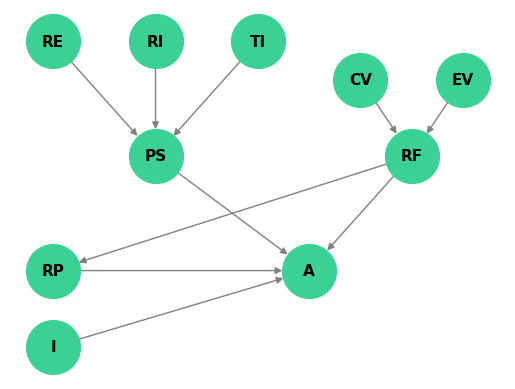

In [278]:
pos = {
  'RE': (1, 0), 
  'RI': (2, 0), 
  'TI': (3, 0), 
  'PS': (2, -3), 
  'CV': (4, -1), 
  'EV': (5, -1),
  'RF': (4.5, -3),
  'RP': (1, -6),
  'I': (1, -8),
  'A': (3.5, -6)
  }

nx.draw_networkx(model, pos=pos, with_labels=True, node_color='#3cd194',
                 node_size=1500, font_size=11, font_weight='bold', edge_color='gray')

plt.axis('off')
plt.show()

## 2.3. Aprendizaje de parámetros

In [279]:
pe = ParameterEstimator(model, df_model)

### 2.3.1. Frecuencia de estados

In [280]:
# 1. RE: RANGO DE EDAD
print(f"Frequencies for RE:")
print(pe.state_counts('RE'))

Frequencies for RE:
    count
RE       
0    1989
1    3090
2   13800
3    6770


In [281]:
# 2. RI: RANGO DE INGRESO
print(f"Frequencies for RI:")
print(pe.state_counts('RI'))

Frequencies for RI:
    count
RI       
0    5313
1    4699
2    5156
3    5787
4    4694


In [282]:
# 3. TI: TIPO DE INGRESO
print(f"Frequencies for TI:")
print(pe.state_counts('TI'))

Frequencies for TI:
    count
TI       
0   22060
1    3589


In [283]:
# 4. PS: PERFIL SCORE
print(f"Frequencies for PS:")
print(pe.state_counts('PS'))

Frequencies for PS:
RE      0                                                          ...      3  \
RI      0            1            2            3           4       ...      0   
TI      0     1      0     1      0     1      0     1     0    1  ...      0   
PS                                                                 ...          
0   571.0  47.0  414.0  59.0  273.0  45.0  171.0   9.0  51.0  8.0  ...  658.0   
1    30.0   0.0   10.0   6.0    0.0  14.0    0.0   0.0   0.0  0.0  ...   10.0   
2   120.0  64.0   31.0  21.0    5.0  18.0    0.0  17.0   2.0  3.0  ...   57.0   

RE                                                                 
RI             1            2             3              4         
TI      1      0     1      0     1       0      1       0      1  
PS                                                                 
0   159.0  785.0  59.0  949.0  80.0  1528.0  177.0  1460.0  333.0  
1    34.0   24.0   0.0   15.0   2.0     8.0    4.0     2.0    2.0  
2   

In [284]:
# 5. CV: CLASE DE VEHICULO
print(f"Frequencies for CV:")
print(pe.state_counts('CV'))

Frequencies for CV:
    count
CV       
0       9
1   25553
2      87


In [285]:
# 6. EV: ESTADO DE VEHICULO
print(f"Frequencies for EV:")
print(pe.state_counts('EV'))

Frequencies for EV:
    count
EV       
0    1934
1   23715


In [286]:
# 7. RF: RANGO DE FINANCIAMIENTO
print(f"Frequencies for RF:")
print(pe.state_counts('RF'))

Frequencies for RF:
CV    0           1            2      
EV    0    1      0       1    0     1
RF                                    
0   0.0  1.0  846.0  5526.0  0.0   0.0
1   0.0  0.0  488.0  6701.0  0.0  13.0
2   0.0  0.0  329.0  5280.0  0.0   8.0
3   0.0  0.0  165.0  4034.0  0.0  28.0
4   0.0  8.0  106.0  2078.0  0.0  38.0


In [287]:
# 8. RP: RANGO DE PLAZO
print(f"Frequencies for RP:")
print(pe.state_counts('RP'))

Frequencies for RP:
RF     0     1     2     3     4
RP                              
0    418   400   555   360   161
1    328    73    25    14     7
2    784   334   161    81    46
3   1739  2055  1659  1238   485
4   3070  4276  3119  2473  1465
5     34    64    98    61    66


In [288]:
# 9. I: FLAG INMUEBLE
print(f"Frequencies for I:")
print(pe.state_counts('I'))

Frequencies for I:
   count
I       
0  19888
1   5761


In [289]:
# 10. A: APROBADO
print(f"Frequencies for A:")
print(pe.state_counts('A'))

Frequencies for A:
I       0                                                                  \
PS      0                                                                   
RF      0                                          1                        
RP      0      1      2       3       4     5      0     1      2       3   
A                                                                           
0    31.0   48.0   89.0   185.0   416.0   2.0   32.0  10.0   52.0   267.0   
1   242.0  199.0  517.0  1063.0  1571.0  20.0  205.0  18.0  152.0  1083.0   

I   ...    1                                                 
PS  ...    2                                                 
RF  ...    3                     4                           
RP  ...    2     3     4    5    0    1    2    3    4    5  
A   ...                                                      
0   ...  0.0   9.0  21.0  0.0  2.0  0.0  0.0  1.0  9.0  0.0  
1   ...  9.0  24.0  33.0  0.0  3.0  0.0  0.0  3.0  7.0  0.0  

[2 row

### 2.3.2. Maxima Verosimilitud

In [290]:
mle = MaximumLikelihoodEstimator(model, df_model)

In [291]:
# 1. RE: RANGO DE EDAD
print(mle.estimate_cpd('RE'))

+-------+-----------+
| RE(0) | 0.0775469 |
+-------+-----------+
| RE(1) | 0.120473  |
+-------+-----------+
| RE(2) | 0.538033  |
+-------+-----------+
| RE(3) | 0.263948  |
+-------+-----------+


In [292]:
# 2. RI: RANGO DE INGRESO
print(mle.estimate_cpd('RI'))

+-------+----------+
| RI(0) | 0.207143 |
+-------+----------+
| RI(1) | 0.183204 |
+-------+----------+
| RI(2) | 0.201021 |
+-------+----------+
| RI(3) | 0.225623 |
+-------+----------+
| RI(4) | 0.183009 |
+-------+----------+


In [293]:
# 3. TI: TIPO DE INGRESO
print(mle.estimate_cpd('TI'))

+-------+----------+
| TI(0) | 0.860073 |
+-------+----------+
| TI(1) | 0.139927 |
+-------+----------+


In [294]:
# 4. PS: PERFIL SCORE
print(mle.estimate_cpd('PS'))

+-------+---------------------+-----+---------------------+
| RE    | RE(0)               | ... | RE(3)               |
+-------+---------------------+-----+---------------------+
| RI    | RI(0)               | ... | RI(4)               |
+-------+---------------------+-----+---------------------+
| TI    | TI(0)               | ... | TI(1)               |
+-------+---------------------+-----+---------------------+
| PS(0) | 0.7919556171983356  | ... | 0.943342776203966   |
+-------+---------------------+-----+---------------------+
| PS(1) | 0.04160887656033287 | ... | 0.0056657223796034  |
+-------+---------------------+-----+---------------------+
| PS(2) | 0.1664355062413315  | ... | 0.05099150141643059 |
+-------+---------------------+-----+---------------------+


In [295]:
# 5. CV: CLASE DE VEHICULO
print(mle.estimate_cpd('CV'))

+-------+-------------+
| CV(0) | 0.000350891 |
+-------+-------------+
| CV(1) | 0.996257    |
+-------+-------------+
| CV(2) | 0.00339195  |
+-------+-------------+


In [296]:
# 6. EV: ESTADO DE VEHICULO
print(mle.estimate_cpd('EV'))

+-------+-----------+
| EV(0) | 0.0754025 |
+-------+-----------+
| EV(1) | 0.924597  |
+-------+-----------+


In [297]:
# 7. RF: RANGO DE FINANCIAMIENTO
print(mle.estimate_cpd('RF'))

+-------+-------+-----+-------+---------------------+
| CV    | CV(0) | ... | CV(2) | CV(2)               |
+-------+-------+-----+-------+---------------------+
| EV    | EV(0) | ... | EV(0) | EV(1)               |
+-------+-------+-----+-------+---------------------+
| RF(0) | 0.2   | ... | 0.2   | 0.0                 |
+-------+-------+-----+-------+---------------------+
| RF(1) | 0.2   | ... | 0.2   | 0.14942528735632185 |
+-------+-------+-----+-------+---------------------+
| RF(2) | 0.2   | ... | 0.2   | 0.09195402298850575 |
+-------+-------+-----+-------+---------------------+
| RF(3) | 0.2   | ... | 0.2   | 0.3218390804597701  |
+-------+-------+-----+-------+---------------------+
| RF(4) | 0.2   | ... | 0.2   | 0.4367816091954023  |
+-------+-------+-----+-------+---------------------+


In [298]:
# 8. RP: RANGO DE PLAZO
print(mle.estimate_cpd('RP'))

+-------+-----------------------+-----+----------------------+
| RF    | RF(0)                 | ... | RF(4)                |
+-------+-----------------------+-----+----------------------+
| RP(0) | 0.06558920445630001   | ... | 0.07219730941704036  |
+-------+-----------------------+-----+----------------------+
| RP(1) | 0.05146712694178566   | ... | 0.003139013452914798 |
+-------+-----------------------+-----+----------------------+
| RP(2) | 0.1230189863486584    | ... | 0.02062780269058296  |
+-------+-----------------------+-----+----------------------+
| RP(3) | 0.27286991997489407   | ... | 0.21748878923766815  |
+-------+-----------------------+-----+----------------------+
| RP(4) | 0.4817197552173231    | ... | 0.6569506726457399   |
+-------+-----------------------+-----+----------------------+
| RP(5) | 0.0053350070610387575 | ... | 0.029596412556053813 |
+-------+-----------------------+-----+----------------------+


In [299]:
# 9. I: FLAG INMUEBLE
print(mle.estimate_cpd('I'))

+------+----------+
| I(0) | 0.775391 |
+------+----------+
| I(1) | 0.224609 |
+------+----------+


In [300]:
# 10. A: APROBADO
print(mle.estimate_cpd('A'))

+------+---------------------+-----+-------+-------+--------+-------+
| I    | I(0)                | ... | I(1)  | I(1)  | I(1)   | I(1)  |
+------+---------------------+-----+-------+-------+--------+-------+
| PS   | PS(0)               | ... | PS(2) | PS(2) | PS(2)  | PS(2) |
+------+---------------------+-----+-------+-------+--------+-------+
| RF   | RF(0)               | ... | RF(4) | RF(4) | RF(4)  | RF(4) |
+------+---------------------+-----+-------+-------+--------+-------+
| RP   | RP(0)               | ... | RP(2) | RP(3) | RP(4)  | RP(5) |
+------+---------------------+-----+-------+-------+--------+-------+
| A(0) | 0.11355311355311355 | ... | 0.5   | 0.25  | 0.5625 | 0.5   |
+------+---------------------+-----+-------+-------+--------+-------+
| A(1) | 0.8864468864468864  | ... | 0.5   | 0.75  | 0.4375 | 0.5   |
+------+---------------------+-----+-------+-------+--------+-------+


### 2.3.2. Estimar los parámetros bayesianos

In [301]:
be = BayesianEstimator(model, df_model)

In [302]:
# 1. RE: RANGO DE EDAD
cpd_RE = be.estimate_cpd('RE', prior_type='BDeu')
print(cpd_RE)

+-------+-----------+
| RE(0) | 0.0775805 |
+-------+-----------+
| RE(1) | 0.120498  |
+-------+-----------+
| RE(2) | 0.537977  |
+-------+-----------+
| RE(3) | 0.263945  |
+-------+-----------+


In [303]:
# 2. RI: RANGO DE INGRESO
cpd_RI = be.estimate_cpd('RI', prior_type='BDeu')
print(cpd_RI)

+-------+----------+
| RI(0) | 0.207141 |
+-------+----------+
| RI(1) | 0.183207 |
+-------+----------+
| RI(2) | 0.201021 |
+-------+----------+
| RI(3) | 0.225618 |
+-------+----------+
| RI(4) | 0.183012 |
+-------+----------+


In [304]:
# 3. TI: TIPO DE INGRESO
cpd_TI = be.estimate_cpd('TI', prior_type='BDeu')
print(cpd_TI)

+-------+----------+
| TI(0) | 0.860002 |
+-------+----------+
| TI(1) | 0.139998 |
+-------+----------+


In [305]:
# 4. PS: PERFIL SCORE
cpd_PS = be.estimate_cpd('PS', prior_type='BDeu')
print(cpd_PS)

+-------+----------------------+-----+----------------------+
| RE    | RE(0)                | ... | RE(3)                |
+-------+----------------------+-----+----------------------+
| RI    | RI(0)                | ... | RI(4)                |
+-------+----------------------+-----+----------------------+
| TI    | TI(0)                | ... | TI(1)                |
+-------+----------------------+-----+----------------------+
| PS(0) | 0.7918761194892241   | ... | 0.943126843657817    |
+-------+----------------------+-----+----------------------+
| PS(1) | 0.041659444155544005 | ... | 0.005781710914454276 |
+-------+----------------------+-----+----------------------+
| PS(2) | 0.16646443635523203  | ... | 0.05109144542772861  |
+-------+----------------------+-----+----------------------+


In [306]:
for i in range(0, len(cpd_PS.values)):
  for j in range(0, len(cpd_PS.values[i])):
    for k in range(0, len(cpd_PS.values[i][j])):
      for l in range(0, len(cpd_PS.values[i][j][k])):
        print('ps_',i,'re_',j,'ri_',k,'ti_',l,': ',cpd_PS.values[i][j][k][l])

ps_ 0 re_ 0 ri_ 0 ti_ 0 :  0.7918761194892241
ps_ 0 re_ 0 ri_ 0 ti_ 1 :  0.4233220847394076
ps_ 0 re_ 0 ri_ 1 ti_ 0 :  0.9097317586743567
ps_ 0 re_ 0 ri_ 1 ti_ 1 :  0.6855345911949685
ps_ 0 re_ 0 ri_ 2 ti_ 0 :  0.9817228464419474
ps_ 0 re_ 0 ri_ 2 ti_ 1 :  0.584008643976229
ps_ 0 re_ 0 ri_ 3 ti_ 0 :  0.9995130265400537
ps_ 0 re_ 0 ri_ 3 ti_ 1 :  0.3460925039872408
ps_ 0 re_ 0 ri_ 4 ti_ 0 :  0.9607843137254903
ps_ 0 re_ 0 ri_ 4 ti_ 1 :  0.7228464419475656
ps_ 0 re_ 1 ri_ 0 ti_ 0 :  0.8227181688125895
ps_ 0 re_ 1 ri_ 0 ti_ 1 :  0.3980732177263969
ps_ 0 re_ 1 ri_ 1 ti_ 0 :  0.9121447028423774
ps_ 0 re_ 1 ri_ 1 ti_ 1 :  0.408947700063012
ps_ 0 re_ 1 ri_ 2 ti_ 0 :  0.899575579497225
ps_ 0 re_ 1 ri_ 2 ti_ 1 :  0.5791212421539478
ps_ 0 re_ 1 ri_ 3 ti_ 0 :  0.980349167681689
ps_ 0 re_ 1 ri_ 3 ti_ 1 :  0.6309263311451495
ps_ 0 re_ 1 ri_ 4 ti_ 0 :  0.9704374057315235
ps_ 0 re_ 1 ri_ 4 ti_ 1 :  0.653817082388511
ps_ 0 re_ 2 ri_ 0 ti_ 0 :  0.7421749863380256
ps_ 0 re_ 2 ri_ 0 ti_ 1 :  0.4160994645

In [307]:
# 5. CV: CLASE DE VEHICULO
cpd_CV = be.estimate_cpd('CV', prior_type='BDeu')
print(cpd_CV)

+-------+------------+
| CV(0) | 0.00041579 |
+-------+------------+
| CV(1) | 0.996128   |
+-------+------------+
| CV(2) | 0.00345625 |
+-------+------------+


In [308]:
# 6. EV: ESTADO DE VEHICULO
cpd_EV = be.estimate_cpd('EV', prior_type='BDeu')
print(cpd_EV)

+-------+-----------+
| EV(0) | 0.0754853 |
+-------+-----------+
| EV(1) | 0.924515  |
+-------+-----------+


In [309]:
# 7. RF: RANGO DE FINANCIAMIENTO
cpd_RF = be.estimate_cpd('RF', prior_type='BDeu')
print(cpd_RF)

+-------+-------+-----+-------+-----------------------+
| CV    | CV(0) | ... | CV(2) | CV(2)                 |
+-------+-------+-----+-------+-----------------------+
| EV    | EV(0) | ... | EV(0) | EV(1)                 |
+-------+-------+-----+-------+-----------------------+
| RF(0) | 0.2   | ... | 0.2   | 0.0018975332068311191 |
+-------+-------+-----+-------+-----------------------+
| RF(1) | 0.2   | ... | 0.2   | 0.1499051233396584    |
+-------+-------+-----+-------+-----------------------+
| RF(2) | 0.2   | ... | 0.2   | 0.09297912713472484   |
+-------+-------+-----+-------+-----------------------+
| RF(3) | 0.2   | ... | 0.2   | 0.3206831119544592    |
+-------+-------+-----+-------+-----------------------+
| RF(4) | 0.2   | ... | 0.2   | 0.4345351043643263    |
+-------+-------+-----+-------+-----------------------+


In [310]:
for i in range(0, len(cpd_RF.values)):
  for j in range(0, len(cpd_RF.values[i])):
    for k in range(0, len(cpd_RF.values[i][j])):
        print('rf_',i,'cv_',j,'ev_',k,': ',cpd_RF.values[i][j][k])

rf_ 0 cv_ 0 ev_ 0 :  0.2
rf_ 0 cv_ 0 ev_ 1 :  0.11864406779661019
rf_ 0 cv_ 1 ev_ 0 :  0.43733310362649663
rf_ 0 cv_ 1 ev_ 1 :  0.23396298308624813
rf_ 0 cv_ 2 ev_ 0 :  0.2
rf_ 0 cv_ 2 ev_ 1 :  0.0018975332068311191
rf_ 1 cv_ 0 ev_ 0 :  0.2
rf_ 1 cv_ 0 ev_ 1 :  0.01694915254237288
rf_ 1 cv_ 1 ev_ 0 :  0.25230424670514257
rf_ 1 cv_ 1 ev_ 1 :  0.28370931208941635
rf_ 1 cv_ 2 ev_ 0 :  0.2
rf_ 1 cv_ 2 ev_ 1 :  0.1499051233396584
rf_ 2 cv_ 0 ev_ 0 :  0.2
rf_ 2 cv_ 0 ev_ 1 :  0.01694915254237288
rf_ 2 cv_ 1 ev_ 0 :  0.17012662589370317
rf_ 2 cv_ 1 ev_ 1 :  0.22354800697154226
rf_ 2 cv_ 2 ev_ 0 :  0.2
rf_ 2 cv_ 2 ev_ 1 :  0.09297912713472484
rf_ 3 cv_ 0 ev_ 0 :  0.2
rf_ 3 cv_ 0 ev_ 1 :  0.01694915254237288
rf_ 3 cv_ 1 ev_ 0 :  0.08536480316995433
rf_ 3 cv_ 1 ev_ 1 :  0.17079572957754427
rf_ 3 cv_ 2 ev_ 0 :  0.2
rf_ 3 cv_ 2 ev_ 1 :  0.3206831119544592
rf_ 4 cv_ 0 ev_ 0 :  0.2
rf_ 4 cv_ 0 ev_ 1 :  0.8305084745762712
rf_ 4 cv_ 1 ev_ 0 :  0.054871220604703244
rf_ 4 cv_ 1 ev_ 1 :  0.08798396827524

In [311]:
# 8. RP: RANGO DE PLAZO
cpd_RP = be.estimate_cpd('RP', prior_type='BDeu')
print(cpd_RP)

+-------+----------------------+-----+-----------------------+
| RF    | RF(0)                | ... | RF(4)                 |
+-------+----------------------+-----+-----------------------+
| RP(0) | 0.06560506223198409  | ... | 0.07223965336919169   |
+-------+----------------------+-----+-----------------------+
| RP(1) | 0.051485200292856394 | ... | 0.0032123113700881518 |
+-------+----------------------+-----+-----------------------+
| RP(2) | 0.12302583411777009  | ... | 0.02069326161661437   |
+-------+----------------------+-----+-----------------------+
| RP(3) | 0.27285325802740296  | ... | 0.21746600926340953   |
+-------+----------------------+-----+-----------------------+
| RP(4) | 0.48167032737161375  | ... | 0.6567309128940685    |
+-------+----------------------+-----+-----------------------+
| RP(5) | 0.005360317958372554 | ... | 0.029657851486627824  |
+-------+----------------------+-----+-----------------------+


In [312]:
for i in range(0, len(cpd_RP.values)):
  for j in range(0, len(cpd_RP.values[i])):
        print('rp_',i,'rf_',j,': ',cpd_RP.values[i][j])

rp_ 0 rf_ 0 :  0.06560506223198409
rp_ 0 rf_ 1 :  0.05555555555555555
rp_ 0 rf_ 2 :  0.0988192713895811
rp_ 0 rf_ 3 :  0.08518606117943867
rp_ 0 rf_ 4 :  0.07223965336919169
rp_ 1 rf_ 0 :  0.051485200292856394
rp_ 1 rf_ 1 :  0.010157804618446018
rp_ 1 rf_ 2 :  0.004479648748071674
rp_ 1 rf_ 3 :  0.0033506780195521916
rp_ 1 rf_ 4 :  0.0032123113700881518
rp_ 2 rf_ 0 :  0.12302583411777009
rp_ 2 rf_ 1 :  0.04639270674256097
rp_ 2 rf_ 2 :  0.028687551916458998
rp_ 2 rf_ 3 :  0.019197414064963735
rp_ 2 rf_ 4 :  0.02069326161661437
rp_ 3 rf_ 0 :  0.27285325802740296
rp_ 3 rf_ 1 :  0.2853209310935258
rp_ 3 rf_ 2 :  0.2953304853447253
rp_ 3 rf_ 3 :  0.2928492589088616
rp_ 3 rf_ 4 :  0.21746600926340953
rp_ 4 rf_ 0 :  0.48167032737161375
rp_ 4 rf_ 1 :  0.5936646767550557
rp_ 4 rf_ 2 :  0.5552094458288833
rp_ 4 rf_ 3 :  0.5849495427309996
rp_ 4 rf_ 4 :  0.6567309128940685
rp_ 5 rf_ 0 :  0.005360317958372554
rp_ 5 rf_ 1 :  0.008908325234855847
rp_ 5 rf_ 2 :  0.017473596772279578
rp_ 5 rf_ 3 :  0

In [313]:
# 9. I: FLAG INMUEBLE
cpd_I = be.estimate_cpd('I', prior_type='BDeu')
print(cpd_I)

+------+----------+
| I(0) | 0.775337 |
+------+----------+
| I(1) | 0.224663 |
+------+----------+


In [314]:
# 10. A: APROBADO
cpd_A = be.estimate_cpd('A', prior_type='BDeu')
print(cpd_A)

+------+---------------------+-----+--------------------+-------+
| I    | I(0)                | ... | I(1)               | I(1)  |
+------+---------------------+-----+--------------------+-------+
| PS   | PS(0)               | ... | PS(2)              | PS(2) |
+------+---------------------+-----+--------------------+-------+
| RF   | RF(0)               | ... | RF(4)              | RF(4) |
+------+---------------------+-----+--------------------+-------+
| RP   | RP(0)               | ... | RP(4)              | RP(5) |
+------+---------------------+-----+--------------------+-------+
| A(0) | 0.11359243056262082 | ... | 0.5623916811091855 | 0.5   |
+------+---------------------+-----+--------------------+-------+
| A(1) | 0.8864075694373792  | ... | 0.4376083188908146 | 0.5   |
+------+---------------------+-----+--------------------+-------+


In [315]:
for i in range(0, len(cpd_A.values)):
  for j in range(0, len(cpd_A.values[i])):
    for k in range(0, len(cpd_A.values[i][j])):
      for l in range(0, len(cpd_A.values[i][j][k])):
        for m in range(0, len(cpd_A.values[i][j][k][l])):
          print('a_',i,'i_',j,'ps_',k,'rf_',l,'rp_',m,': ',cpd_A.values[i][j][k][l][m])

a_ 0 i_ 0 ps_ 0 rf_ 0 rp_ 0 :  0.11359243056262082
a_ 0 i_ 0 ps_ 0 rf_ 0 rp_ 1 :  0.19436635556055323
a_ 0 i_ 0 ps_ 0 rf_ 0 rp_ 2 :  0.14688087271393865
a_ 0 i_ 0 ps_ 0 rf_ 0 rp_ 3 :  0.14824500879164904
a_ 0 i_ 0 ps_ 0 rf_ 0 rp_ 4 :  0.2093649085037675
a_ 0 i_ 0 ps_ 0 rf_ 0 rp_ 5 :  0.0914249684741488
a_ 0 i_ 0 ps_ 0 rf_ 1 rp_ 0 :  0.13506386968240947
a_ 0 i_ 0 ps_ 0 rf_ 1 rp_ 1 :  0.3572844400396432
a_ 0 i_ 0 ps_ 0 rf_ 1 rp_ 2 :  0.2549353301565691
a_ 0 i_ 0 ps_ 0 rf_ 1 rp_ 3 :  0.19778399621406967
a_ 0 i_ 0 ps_ 0 rf_ 1 rp_ 4 :  0.2124107916540907
a_ 0 i_ 0 ps_ 0 rf_ 1 rp_ 5 :  0.1898037338439445
a_ 0 i_ 0 ps_ 0 rf_ 2 rp_ 0 :  0.12586222753609855
a_ 0 i_ 0 ps_ 0 rf_ 2 rp_ 1 :  0.5
a_ 0 i_ 0 ps_ 0 rf_ 2 rp_ 2 :  0.15009719522354903
a_ 0 i_ 0 ps_ 0 rf_ 2 rp_ 3 :  0.2247567294325793
a_ 0 i_ 0 ps_ 0 rf_ 2 rp_ 4 :  0.21973482069948652
a_ 0 i_ 0 ps_ 0 rf_ 2 rp_ 5 :  0.20013882461823232
a_ 0 i_ 0 ps_ 0 rf_ 3 rp_ 0 :  0.08253400143163923
a_ 0 i_ 0 ps_ 0 rf_ 3 rp_ 1 :  0.5711462450592886
a_ 0

In [316]:
model.fit(df_model, estimator=BayesianEstimator, prior_type='BDeu')

## 2.4. Aprendizaje estructurado

### 2.4.2. Grafico aciciclo dirigido

Building tree: 100%|██████████| 45/45.0 [00:02<00:00, 17.93it/s]


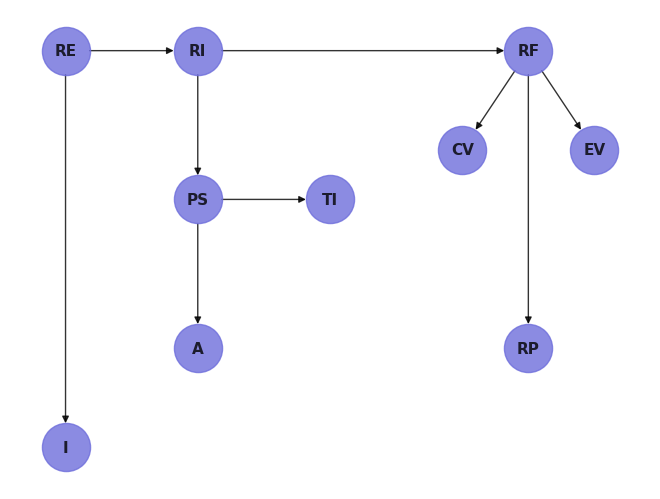

In [317]:
# NSE
ts = TreeSearch(df_model, root_node='RE')
dag_1 = ts.estimate(estimator_type='chow-liu')
pos = {
  'RE': (1, 0), 
  'RI': (2, 0), 
  'TI': (3, -3), 
  'PS': (2, -3), 
  'CV': (4, -2), 
  'EV': (5, -2),
  'RF': (4.5, 0),
  'RP': (4.5, -6),
  'I': (1, -8),
  'A': (2, -6)
  }
#pos = {'NSE': (1, 1), 'TR': (1, 0), 'PTR': (1, -1), 'PP': (1, -2), 'CC': (2, -1), 'E': (2.5, 0),'G': (0, 0),'EC': (3.5, 0),'TC': (0, -1),'RG': (2, -2)}
nx.draw(dag_1, pos=pos, with_labels=True, node_size=1200, node_color='#6e6edb', font_size=11, font_weight='bold', alpha=0.8)
plt.show()

Building tree: 100%|██████████| 45/45.0 [00:00<00:00, 673.02it/s]


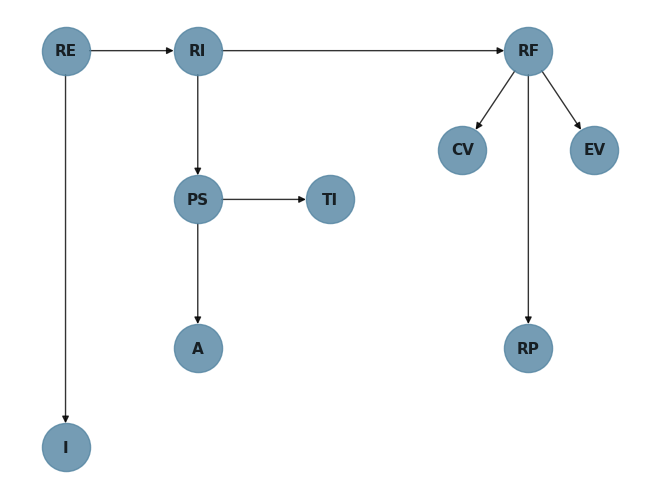

In [318]:
# NSE
ts = TreeSearch(df_model, root_node='RI')
dag_2 = ts.estimate(estimator_type='chow-liu')
pos = {
  'RE': (1, 0), 
  'RI': (2, 0), 
  'TI': (3, -3), 
  'PS': (2, -3), 
  'CV': (4, -2), 
  'EV': (5, -2),
  'RF': (4.5, 0),
  'RP': (4.5, -6),
  'I': (1, -8),
  'A': (2, -6)
  }
#pos = {'NSE': (1, 1), 'TR': (1, 0), 'PTR': (1, -1), 'PP': (1, -2), 'CC': (2, -1), 'E': (2.5, 0),'G': (0, 0),'EC': (3.5, 0),'TC': (0, -1),'RG': (2, -2)}
nx.draw(dag_1, pos=pos, with_labels=True, node_size=1200, node_color='#5384a1', font_size=11, font_weight='bold', alpha=0.8)
plt.show()

Building tree: 100%|██████████| 45/45.0 [00:00<00:00, 642.87it/s]


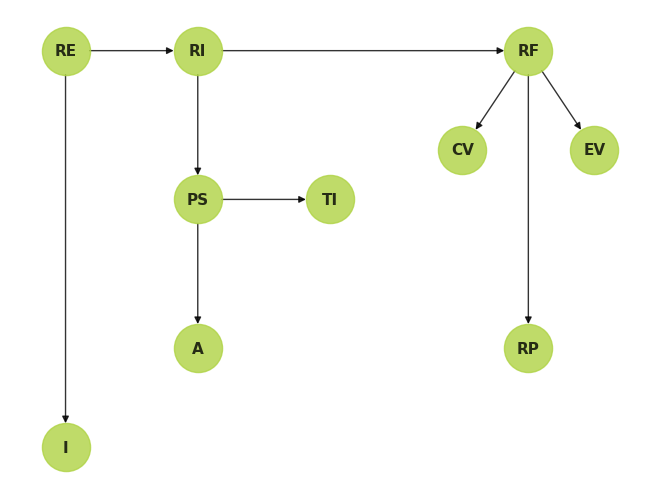

In [319]:
# NSE
ts = TreeSearch(df_model, root_node='TI')
dag_3 = ts.estimate(estimator_type='chow-liu')
pos = {
  'RE': (1, 0), 
  'RI': (2, 0), 
  'TI': (3, -3), 
  'PS': (2, -3), 
  'CV': (4, -2), 
  'EV': (5, -2),
  'RF': (4.5, 0),
  'RP': (4.5, -6),
  'I': (1, -8),
  'A': (2, -6)
  }
#pos = {'NSE': (1, 1), 'TR': (1, 0), 'PTR': (1, -1), 'PP': (1, -2), 'CC': (2, -1), 'E': (2.5, 0),'G': (0, 0),'EC': (3.5, 0),'TC': (0, -1),'RG': (2, -2)}
nx.draw(dag_1, pos=pos, with_labels=True, node_size=1200, node_color='#afd344', font_size=11, font_weight='bold', alpha=0.8)
plt.show()

### 2.4.3. CPDs

In [322]:
# dag_1 -> root_node='NSE'
bn_1 = BayesianNetwork(dag_1)
bn_1.fit(df_model)

for i in df_model.columns:
  print(i,'\n',bn_1.get_cpds(i),'\n')

A 
 +------+---------------------+---------------------+--------------------+
| PS   | PS(0)               | PS(1)               | PS(2)              |
+------+---------------------+---------------------+--------------------+
| A(0) | 0.20653547571763856 | 0.8324022346368715  | 0.4389629096146921 |
+------+---------------------+---------------------+--------------------+
| A(1) | 0.7934645242823615  | 0.16759776536312848 | 0.5610370903853079 |
+------+---------------------+---------------------+--------------------+ 

RF 
 +-------+----------------------+-----+---------------------+
| RI    | RI(0)                | ... | RI(4)               |
+-------+----------------------+-----+---------------------+
| RF(0) | 0.42631281761716544  | ... | 0.12505325948018747 |
+-------+----------------------+-----+---------------------+
| RF(1) | 0.37060041407867494  | ... | 0.17426501917341286 |
+-------+----------------------+-----+---------------------+
| RF(2) | 0.1334462638810465   | ... | 0.235

In [323]:
# dag_2 -> root_node='G'
bn_2 = BayesianNetwork(dag_2)
bn_2.fit(df_model)

for i in df_model.columns:
  print(i,'\n',bn_2.get_cpds(i),'\n')

A 
 +------+---------------------+---------------------+--------------------+
| PS   | PS(0)               | PS(1)               | PS(2)              |
+------+---------------------+---------------------+--------------------+
| A(0) | 0.20653547571763856 | 0.8324022346368715  | 0.4389629096146921 |
+------+---------------------+---------------------+--------------------+
| A(1) | 0.7934645242823615  | 0.16759776536312848 | 0.5610370903853079 |
+------+---------------------+---------------------+--------------------+ 

RF 
 +-------+----------------------+-----+---------------------+
| RI    | RI(0)                | ... | RI(4)               |
+-------+----------------------+-----+---------------------+
| RF(0) | 0.42631281761716544  | ... | 0.12505325948018747 |
+-------+----------------------+-----+---------------------+
| RF(1) | 0.37060041407867494  | ... | 0.17426501917341286 |
+-------+----------------------+-----+---------------------+
| RF(2) | 0.1334462638810465   | ... | 0.235

In [324]:
# dag_3 -> root_node='E'
bn_3 = BayesianNetwork(dag_3)
bn_3.fit(df_model)

for i in df_model.columns:
  print(i,'\n',bn_3.get_cpds(i),'\n')

A 
 +------+---------------------+---------------------+--------------------+
| PS   | PS(0)               | PS(1)               | PS(2)              |
+------+---------------------+---------------------+--------------------+
| A(0) | 0.20653547571763856 | 0.8324022346368715  | 0.4389629096146921 |
+------+---------------------+---------------------+--------------------+
| A(1) | 0.7934645242823615  | 0.16759776536312848 | 0.5610370903853079 |
+------+---------------------+---------------------+--------------------+ 

RF 
 +-------+----------------------+-----+---------------------+
| RI    | RI(0)                | ... | RI(4)               |
+-------+----------------------+-----+---------------------+
| RF(0) | 0.42631281761716544  | ... | 0.12505325948018747 |
+-------+----------------------+-----+---------------------+
| RF(1) | 0.37060041407867494  | ... | 0.17426501917341286 |
+-------+----------------------+-----+---------------------+
| RF(2) | 0.1334462638810465   | ... | 0.235

# 3. Inferencias

In [325]:
inference = VariableElimination(model)

1. Cual es la probabilidad segun el perfil score del cliente pueda acceder a un credito vehicular ?

In [335]:
ps_list = ['[Score bueno] ', '[Score Malo]', '[Score Regular] ']
for index,value in enumerate(ps_list):
  p_ps_a = inference.query(variables=['A'], evidence={'PS':index})    
  print(p_ps_a)
  print('La probabilidad de que un cliente con ',value,' tenga aprobación de un credito vehicular es del ',round(p_ps_a.values[1]*100,2), '%\n')

+------+----------+
| A    |   phi(A) |
+======+==========+
| A(0) |   0.2076 |
+------+----------+
| A(1) |   0.7924 |
+------+----------+
La probabilidad de que un cliente con  [Score bueno]   tenga aprobación de un credito vehicular es del  79.24 %

+------+----------+
| A    |   phi(A) |
+======+==========+
| A(0) |   0.8333 |
+------+----------+
| A(1) |   0.1667 |
+------+----------+
La probabilidad de que un cliente con  [Score Malo]  tenga aprobación de un credito vehicular es del  16.67 %

+------+----------+
| A    |   phi(A) |
+======+==========+
| A(0) |   0.4716 |
+------+----------+
| A(1) |   0.5284 |
+------+----------+
La probabilidad de que un cliente con  [Score Regular]   tenga aprobación de un credito vehicular es del  52.84 %



2. Cual es la probabilidad para clientes segun el perfil score que no tengan inmueble y soliciten un rango de financiamiento mayor a s/ 82k  pueda acceder a un credito vehicular?

In [340]:
ps_list = ['[Score bueno] ', '[Score Malo]', '[Score Regular] ']
for index,value in enumerate(ps_list):
  p_ps_a = inference.query(variables=['A'], evidence={'PS':index, 'I':0, 'RF':4})    
  print(p_ps_a)
  print('La probabilidad de que un cliente con ',value,', sin inmueble y con un rango de financiamiento mayor a 82k que  tenga aprobación de un credito vehicular es del ',round(p_ps_a.values[1]*100,2), '%\n')

+------+----------+
| A    |   phi(A) |
+======+==========+
| A(0) |   0.2745 |
+------+----------+
| A(1) |   0.7255 |
+------+----------+
La probabilidad de que un cliente con  [Score bueno]  , sin inmueble y con un rango de financiamiento mayor a 82k que  tenga aprobación de un credito vehicular es del  72.55 %

+------+----------+
| A    |   phi(A) |
+======+==========+
| A(0) |   0.8996 |
+------+----------+
| A(1) |   0.1004 |
+------+----------+
La probabilidad de que un cliente con  [Score Malo] , sin inmueble y con un rango de financiamiento mayor a 82k que  tenga aprobación de un credito vehicular es del  10.04 %

+------+----------+
| A    |   phi(A) |
+======+==========+
| A(0) |   0.7210 |
+------+----------+
| A(1) |   0.2790 |
+------+----------+
La probabilidad de que un cliente con  [Score Regular]  , sin inmueble y con un rango de financiamiento mayor a 82k que  tenga aprobación de un credito vehicular es del  27.9 %



3. Para cada rango de ingreso con un plazo de pago de hasta 12m, sin un inmueble ¿cuáles son las probabilidades de aprobación de credito ?

In [352]:
ri_list = ['[Menor a 2.5k] ', '[2.5k – 3.3k]', '[3.3k – 4.7k] ', '[4.7k – 7.5k] ','[7.5k a +]']
for index,value in enumerate(ri_list):
  p_ri_a = inference.query(variables=['A'], evidence={'RI':index, 'RP':0, 'I':1})
  print(p_ri_a)
  print('\nLa probabilidad de que un cliente de RI ',value,' tenga aprobación de un credito vehicular es del ',round(p_ri_a.values[1]*100,2), '%\n')

+------+----------+
| A    |   phi(A) |
+======+==========+
| A(0) |   0.2545 |
+------+----------+
| A(1) |   0.7455 |
+------+----------+

La probabilidad de que un cliente de RI  [Menor a 2.5k]   tenga aprobación de un credito vehicular es del  74.55 %

+------+----------+
| A    |   phi(A) |
+======+==========+
| A(0) |   0.2320 |
+------+----------+
| A(1) |   0.7680 |
+------+----------+

La probabilidad de que un cliente de RI  [2.5k – 3.3k]  tenga aprobación de un credito vehicular es del  76.8 %

+------+----------+
| A    |   phi(A) |
+======+==========+
| A(0) |   0.2018 |
+------+----------+
| A(1) |   0.7982 |
+------+----------+

La probabilidad de que un cliente de RI  [3.3k – 4.7k]   tenga aprobación de un credito vehicular es del  79.82 %

+------+----------+
| A    |   phi(A) |
+======+==========+
| A(0) |   0.1743 |
+------+----------+
| A(1) |   0.8257 |
+------+----------+

La probabilidad de que un cliente de RI  [4.7k – 7.5k]   tenga aprobación de un credito vehi

4. Cual es la probabilidad de que se apruebe un credito vehicular para clientes segun su tipo de ingreso con un rango de ingreso menor a 2.5k(0) ?

In [342]:
ps_list = ['[Dependiente ] ', '[Independiente]']
for index,value in enumerate(ps_list):
  p_ps_a = inference.query(variables=['A'], evidence={'PS':index, 'I':0, 'RI':0})    
  print(p_ps_a)
  print('La probabilidad de que un cliente con ',value,', sin inmueble y con un rango de ingreso menor a 2.5k   es del ',round(p_ps_a.values[1]*100,2), '%\n')

+------+----------+
| A    |   phi(A) |
+======+==========+
| A(0) |   0.2066 |
+------+----------+
| A(1) |   0.7934 |
+------+----------+
La probabilidad de que un cliente con  [Dependiente ]  , sin inmueble y con un rango de ingreso menor a 2.5k   es del  79.34 %

+------+----------+
| A    |   phi(A) |
+======+==========+
| A(0) |   0.8578 |
+------+----------+
| A(1) |   0.1422 |
+------+----------+
La probabilidad de que un cliente con  [Independiente] , sin inmueble y con un rango de ingreso menor a 2.5k   es del  14.22 %



5. Cual es la probabilidad de que se apruebe un credito vehicular para clientes que desean adquirir un automovil segun el estado del vehiculo?

In [354]:
ev_list = ['[Nuevo] ', '[Seminuevo]']
for index,value in enumerate(ev_list):
  p_ev_cv_a = inference.query(variables=['A'], evidence={'EV':index, 'CV':1})    
  print(p_ev_cv_a)
  print('La probabilidad de credito para clientes que adquieren un automovil  ',value,',   es del ',round(p_ev_cv_a.values[1]*100,2), '%\n')

+------+----------+
| A    |   phi(A) |
+======+==========+
| A(0) |   0.2418 |
+------+----------+
| A(1) |   0.7582 |
+------+----------+
La probabilidad de credito para clientes que adquieren un automovil   [Nuevo]  ,   es del  75.82 %

+------+----------+
| A    |   phi(A) |
+======+==========+
| A(0) |   0.2546 |
+------+----------+
| A(1) |   0.7454 |
+------+----------+
La probabilidad de credito para clientes que adquieren un automovil   [Seminuevo] ,   es del  74.54 %



# 4. Predicciones

In [355]:
# separar valores de la columna a predecir
test = np.squeeze(df_model.iloc[:, -1].values)
pred = df_model.iloc[:, :-1]

In [356]:
# Modelo propuesto
y_pred = model.predict(pred)
print(accuracy_score(np.squeeze(y_pred.values), test))

100%|██████████| 1752/1752 [00:10<00:00, 172.60it/s]


0.7763655503138523


In [357]:
# Modelo sugerido root_node = 'NSE'
y_pred_ = bn_1.predict(pred)
print(accuracy_score(np.squeeze(y_pred_.values), test))

100%|██████████| 1752/1752 [00:01<00:00, 962.11it/s]


0.7753908534445787


In [358]:
# Modelo sugerido root_node = 'G'
y_pred_ = bn_2.predict(pred)
print(accuracy_score(np.squeeze(y_pred_.values), test))

100%|██████████| 1752/1752 [00:02<00:00, 855.85it/s]


0.7753908534445787


In [359]:
# Modelo sugerido root_node = 'E'
y_pred_ = bn_3.predict(pred)
print(accuracy_score(np.squeeze(y_pred_.values), test))

100%|██████████| 1752/1752 [00:01<00:00, 921.62it/s]


0.7753908534445787
